## Fitting to a polynomial relationship using linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn
seaborn.set()

In [4]:
N=50

First create some noisy sample data with an approximately quadratic relationship.

In [16]:
x1=np.linspace(0,50,N)
y=-10 + 1.3*x1 - 0.01*x1*x1 + 2*np.random.randn(N)
x1=x1.reshape(N,1)  

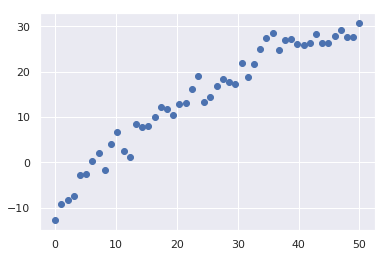

In [17]:
plt.scatter(x1,y)

Last time we assumed a linear relationship between the points.
Now let's assume a more complex relationship: a polynomial with 3 coefficients. We'll call these $w_0, w_1, w_2$,

thus 

$y = w_0 + w_1x + w_2x^2$

or more generally

$y = \Sigma_{i=0}^{2} w_i x^i$


Try out some possible values for $w$

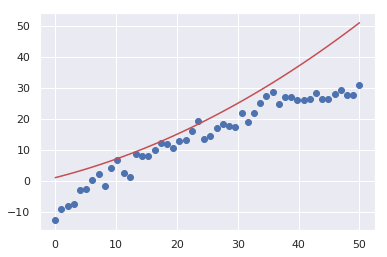

In [18]:
w0,w1,w2=1,0.5,0.01

plt.scatter(x1,y)
plt.plot(
    x1,
    w0+w1*x1+w2*x1**2,
    'r'
)

What is the loss on this?

Next we turn this into a problem of linear regression by adding features to our dataset

In [22]:
X = np.concatenate((
    x1 ,
    x1**2

),axis=1)

In [24]:
X[:10]

array([[ 0.        ,  0.        ],
       [ 1.02040816,  1.04123282],
       [ 2.04081633,  4.16493128],
       [ 3.06122449,  9.37109538],
       [ 4.08163265, 16.65972511],
       [ 5.10204082, 26.03082049],
       [ 6.12244898, 37.48438151],
       [ 7.14285714, 51.02040816],
       [ 8.16326531, 66.63890046],
       [ 9.18367347, 84.33985839]])

In [25]:
reg = linear_model.LinearRegression()
reg.fit(X,y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
reg.intercept_

-10.066159176763458

In [27]:
reg.coef_

array([ 1.3924841 , -0.01214956])

Which implies a solution of the form:

$y = -10.1 + 1.3x - 0.01x^2$

Which is pretty much what we started with.

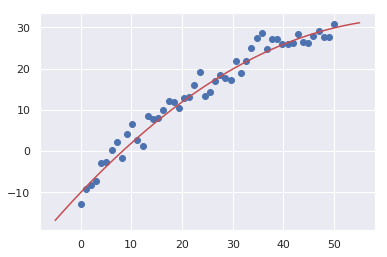

In [28]:
w0,w1,w2=-10.1,1.3,-0.01

plt.scatter(x1,y)

x=np.linspace(-5,55,N).reshape(N,1)
plt.plot(
    x,
    w0+w1*x+w2*x**2,
    'r'
)

## Higher order terms.

Ok, now let's make a much higher order polynomial

In [29]:
X = np.concatenate([
    x1 ** i for i in range(1,10)
],axis=1)

In [30]:
X.shape

(50, 9)

In [31]:
reg = linear_model.LinearRegression()
reg.fit(X,y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
reg.intercept_

-12.307311710327644

In [33]:
reg.coef_

array([ 1.34225501e+00,  6.48259820e-01, -1.76803406e-01,  2.03296935e-02,
       -1.25935364e-03,  4.49540080e-05, -9.23597851e-07,  1.01357149e-08,
       -4.59928762e-11])

In [34]:
def polynomial(x,reg):
    weights=[reg.intercept_] + list(reg.coef_)

    n = len(weights)
    X = np.concatenate([
        x ** i for i in range(0,n)
    ],axis=1)
    
    return np.sum(weights*X,axis=1)
    

In [38]:
x=np.linspace(-2,52,N).reshape(N,1)
p=polynomial(x,reg)

In [39]:
p.shape

(50,)

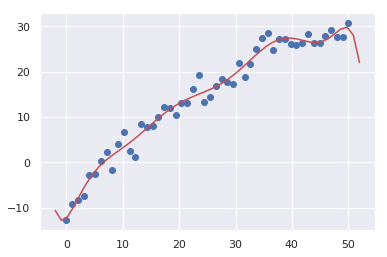

In [40]:
plt.scatter(x1,y)
plt.plot(
    x,
    p,
    'r'
)

And we're heavily into overfitting territory.

## Now try regularization

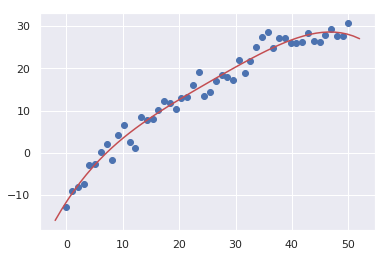

In [46]:
X = np.concatenate([
    x1 ** i for i in range(1,5)
],axis=1)



ridge = linear_model.Ridge()
ridge.fit(X,y,)

plt.scatter(x1,y)
plt.plot(
    x,
    polynomial(x,ridge),
    'r'
)

Compare with

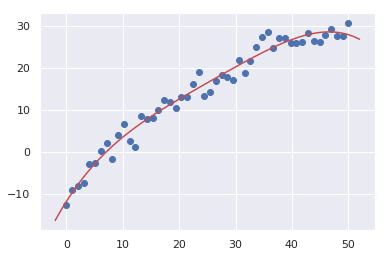

In [47]:
X = np.concatenate([
    x1 ** i for i in range(1,5)
],axis=1)



reg = linear_model.LinearRegression()
reg.fit(X,y,)

plt.scatter(x1,y)
plt.plot(
    x,
    polynomial(x,reg),
    'r'
)

Or indeed:

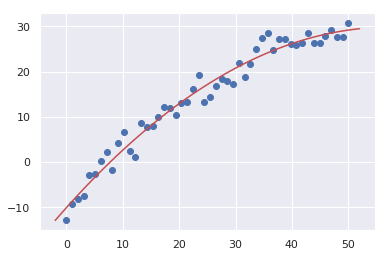

In [48]:
X = np.concatenate([
    x1 ** i for i in range(1,3)
],axis=1)



model = linear_model.LinearRegression()
model.fit(X,y)

plt.scatter(x1,y)
plt.plot(
    x,
    polynomial(x,model),
    'r'
)

scikit-learn provides a `predict` function, which applies the model to a dataset, so I don't actually need my `polynomial` function:

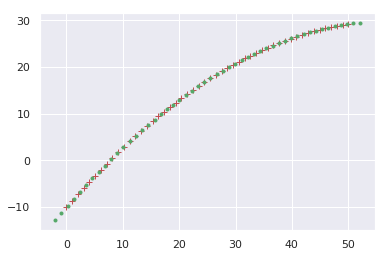

In [52]:
plt.plot(x1,model.predict(X),'r+')
plt.plot(
    x,
    polynomial(x,model),
    'g.'
)